In [4]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('pima-indians-diabetes.csv', names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
for i in range(len(names)-1):
  print(f"{names[i]}\t- {model.feature_importances_[i]:.4f}")

preg	- 0.1076
plas	- 0.2317
pres	- 0.0995
skin	- 0.0780
test	- 0.0784
mass	- 0.1453
pedi	- 0.1174
age	- 0.1421


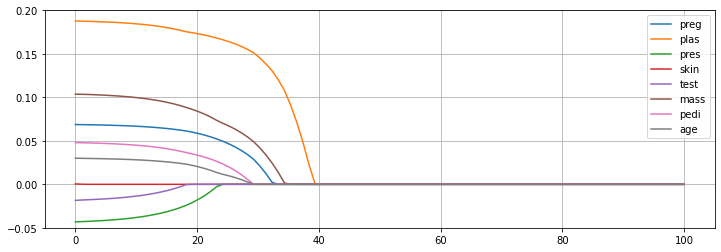

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import  Lasso
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_sc = StandardScaler().fit_transform(X)
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

for i in range(len(list_l)):
  m_l = Lasso(alpha=list_l[i]).fit(X_sc, Y)
  lg_l.append(m_l)
  pred_l.append(m_l.coef_)

plt.figure(figsize=[12,4])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)  
plt.legend(names)      
plt.grid() 